In [92]:
# use svm, logistic

## Imports

In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, roc_curve
from sklearn.model_selection import train_test_split

In [94]:
data = pd.read_csv("./WineQT.csv", index_col="Id")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
Id,,,,,,,,,,,,
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## **A)** Plot histogram of each attribute regarding Y=0, Y=1 and Y=2, and display the number of samples (Y) for each quality classes

quality class - 0 (y = 2,3,4), 1 (y = 5, 6), 2 (y = 7, 8)

In [95]:
class_0 = data[(data["quality"] == 2) | (data["quality"] == 3) | (data["quality"] == 4)]
class_1 = data[(data["quality"] == 5) | (data["quality"] == 6)]
class_2 = data[(data["quality"] == 7) | (data["quality"] == 8)]

quality_data = {"Poor Quality": class_0, "Medium Quality": class_1, "Premium Quality": class_2}

#### Quality-wise feature distriution

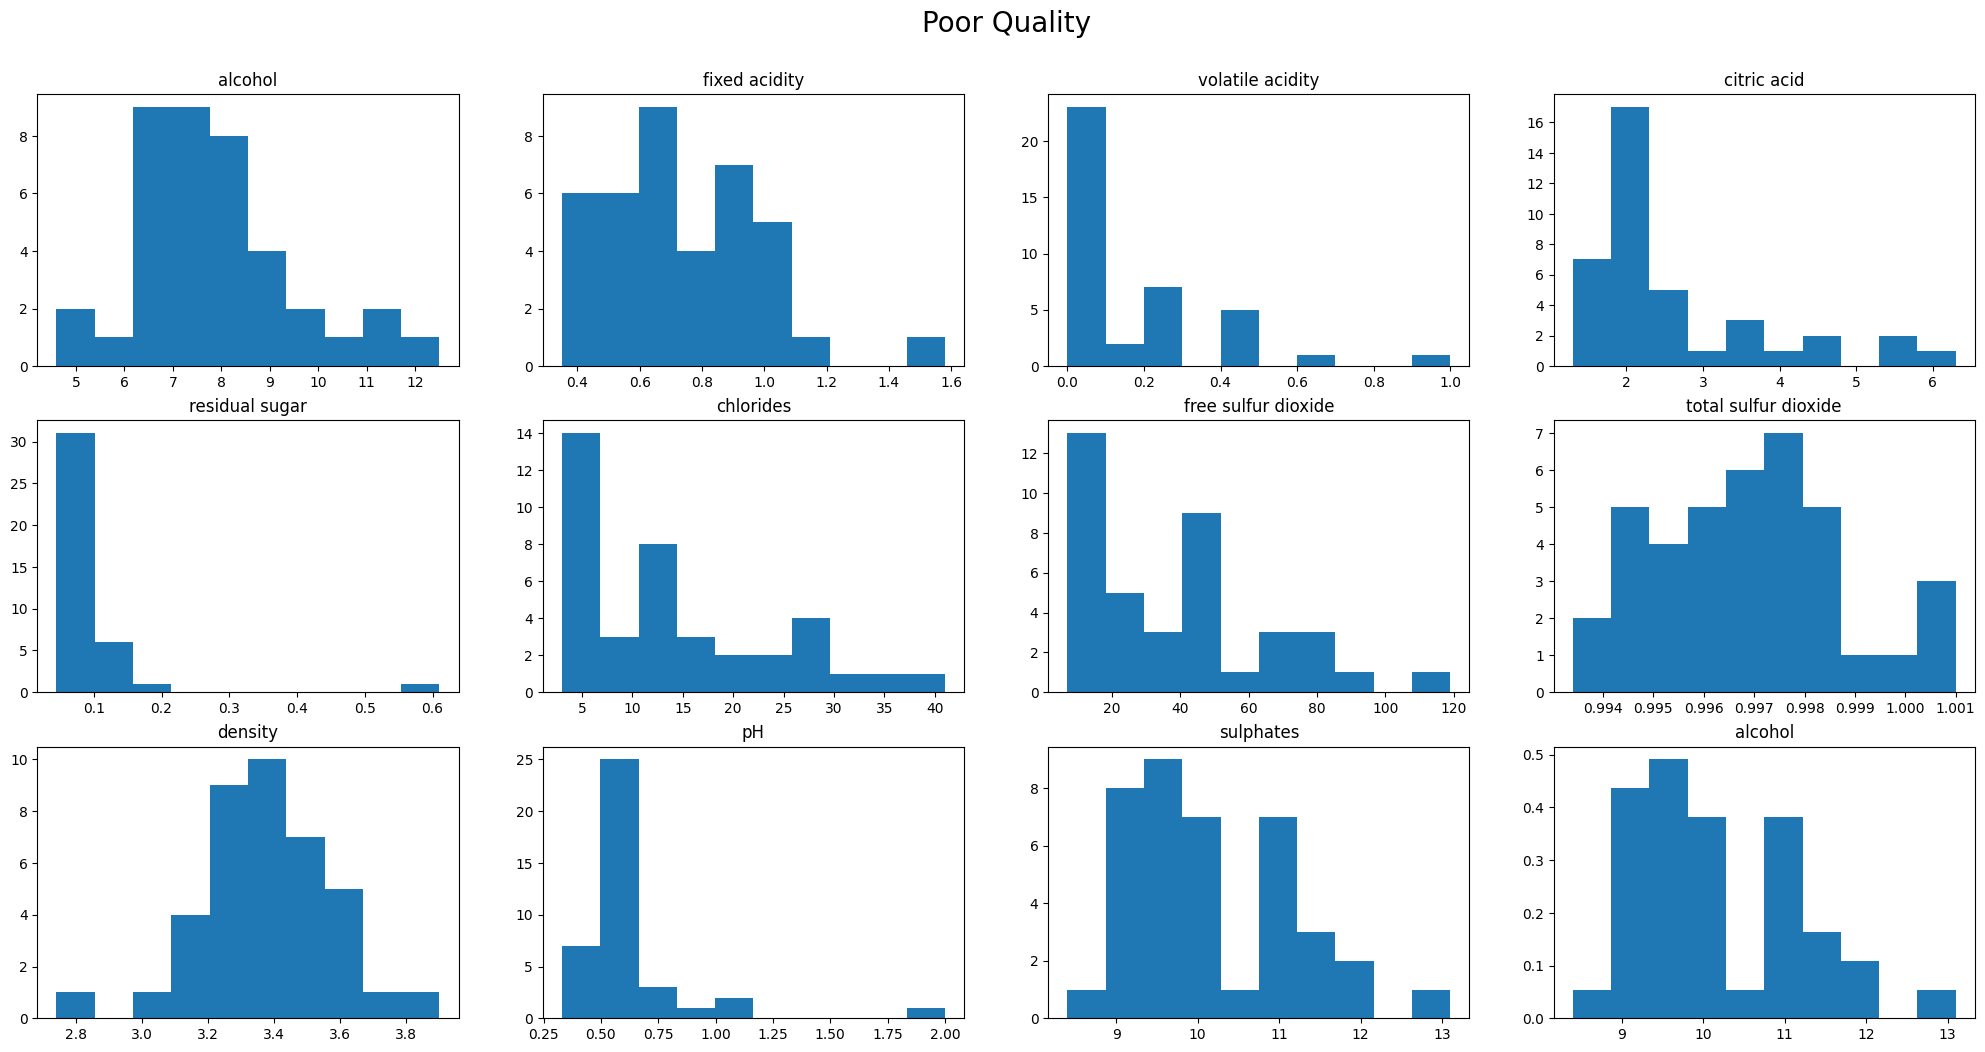

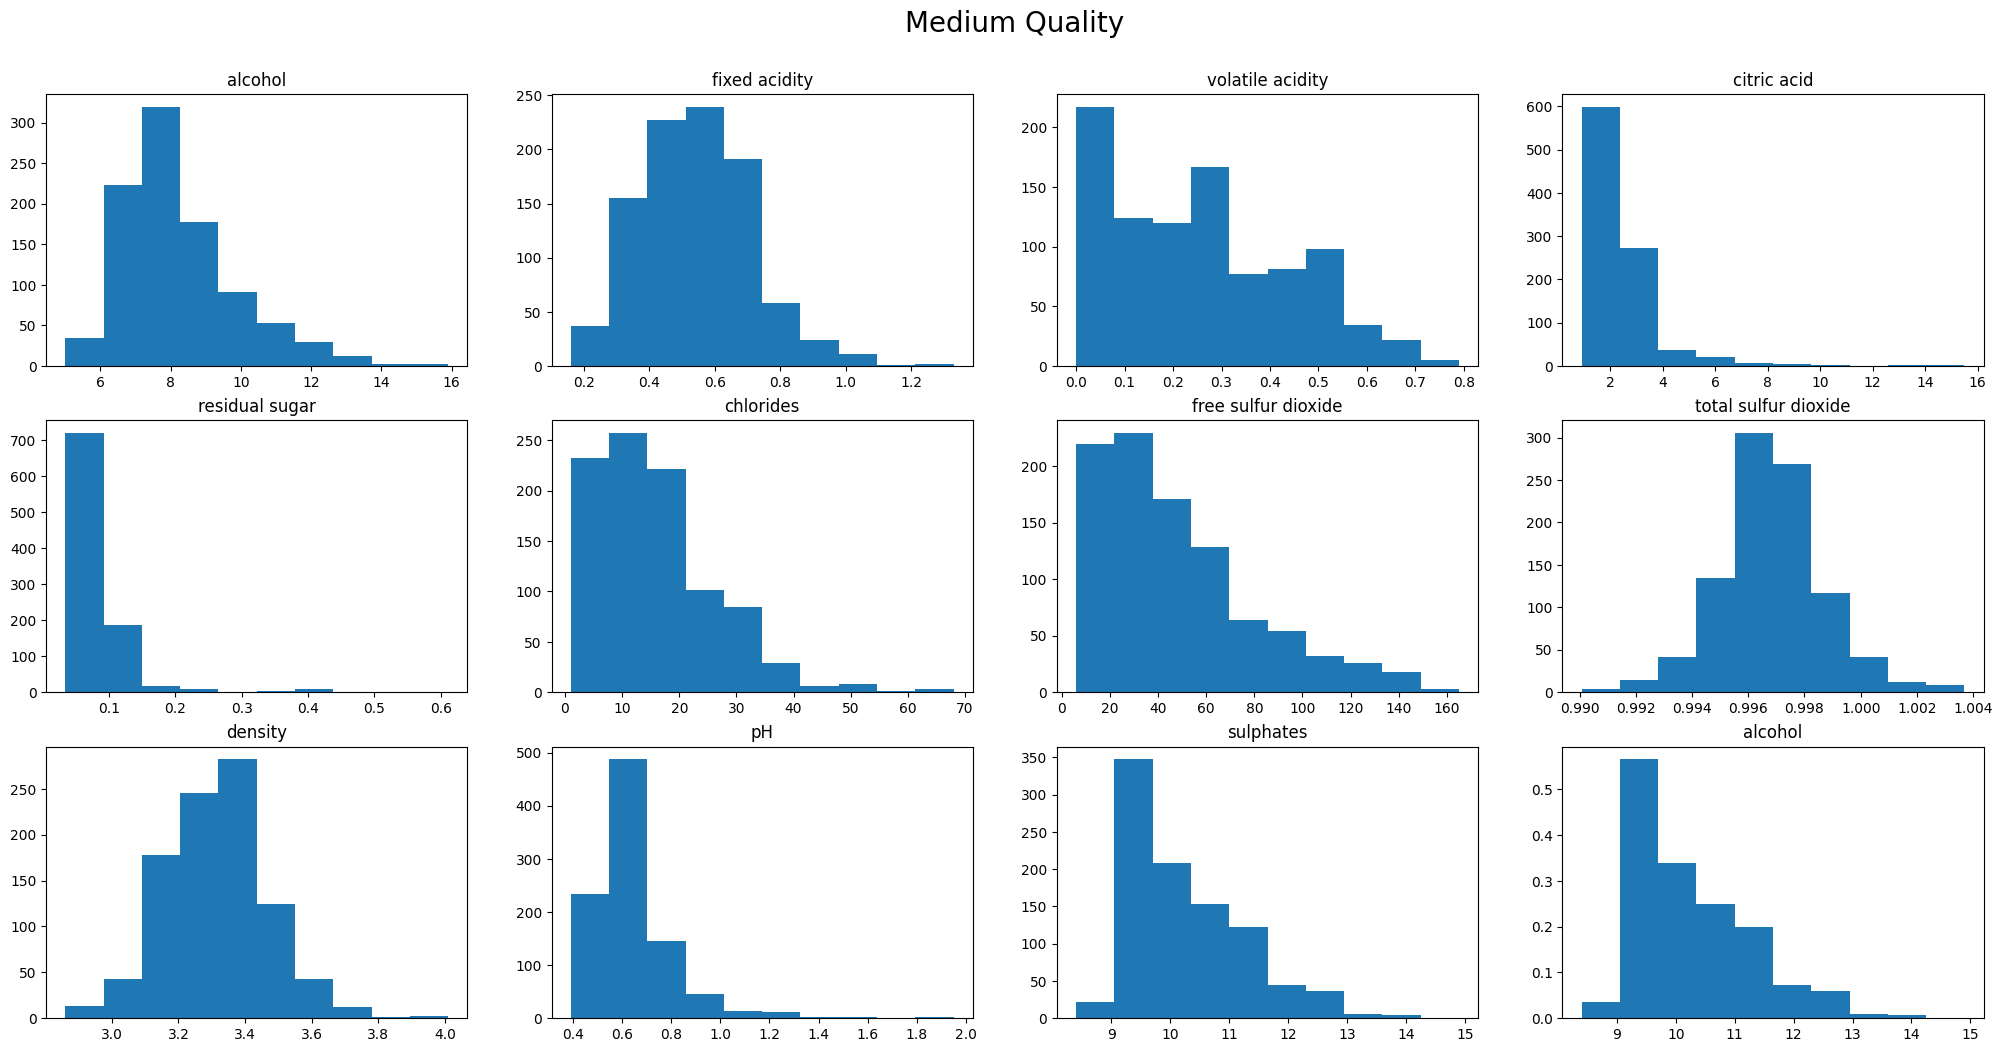

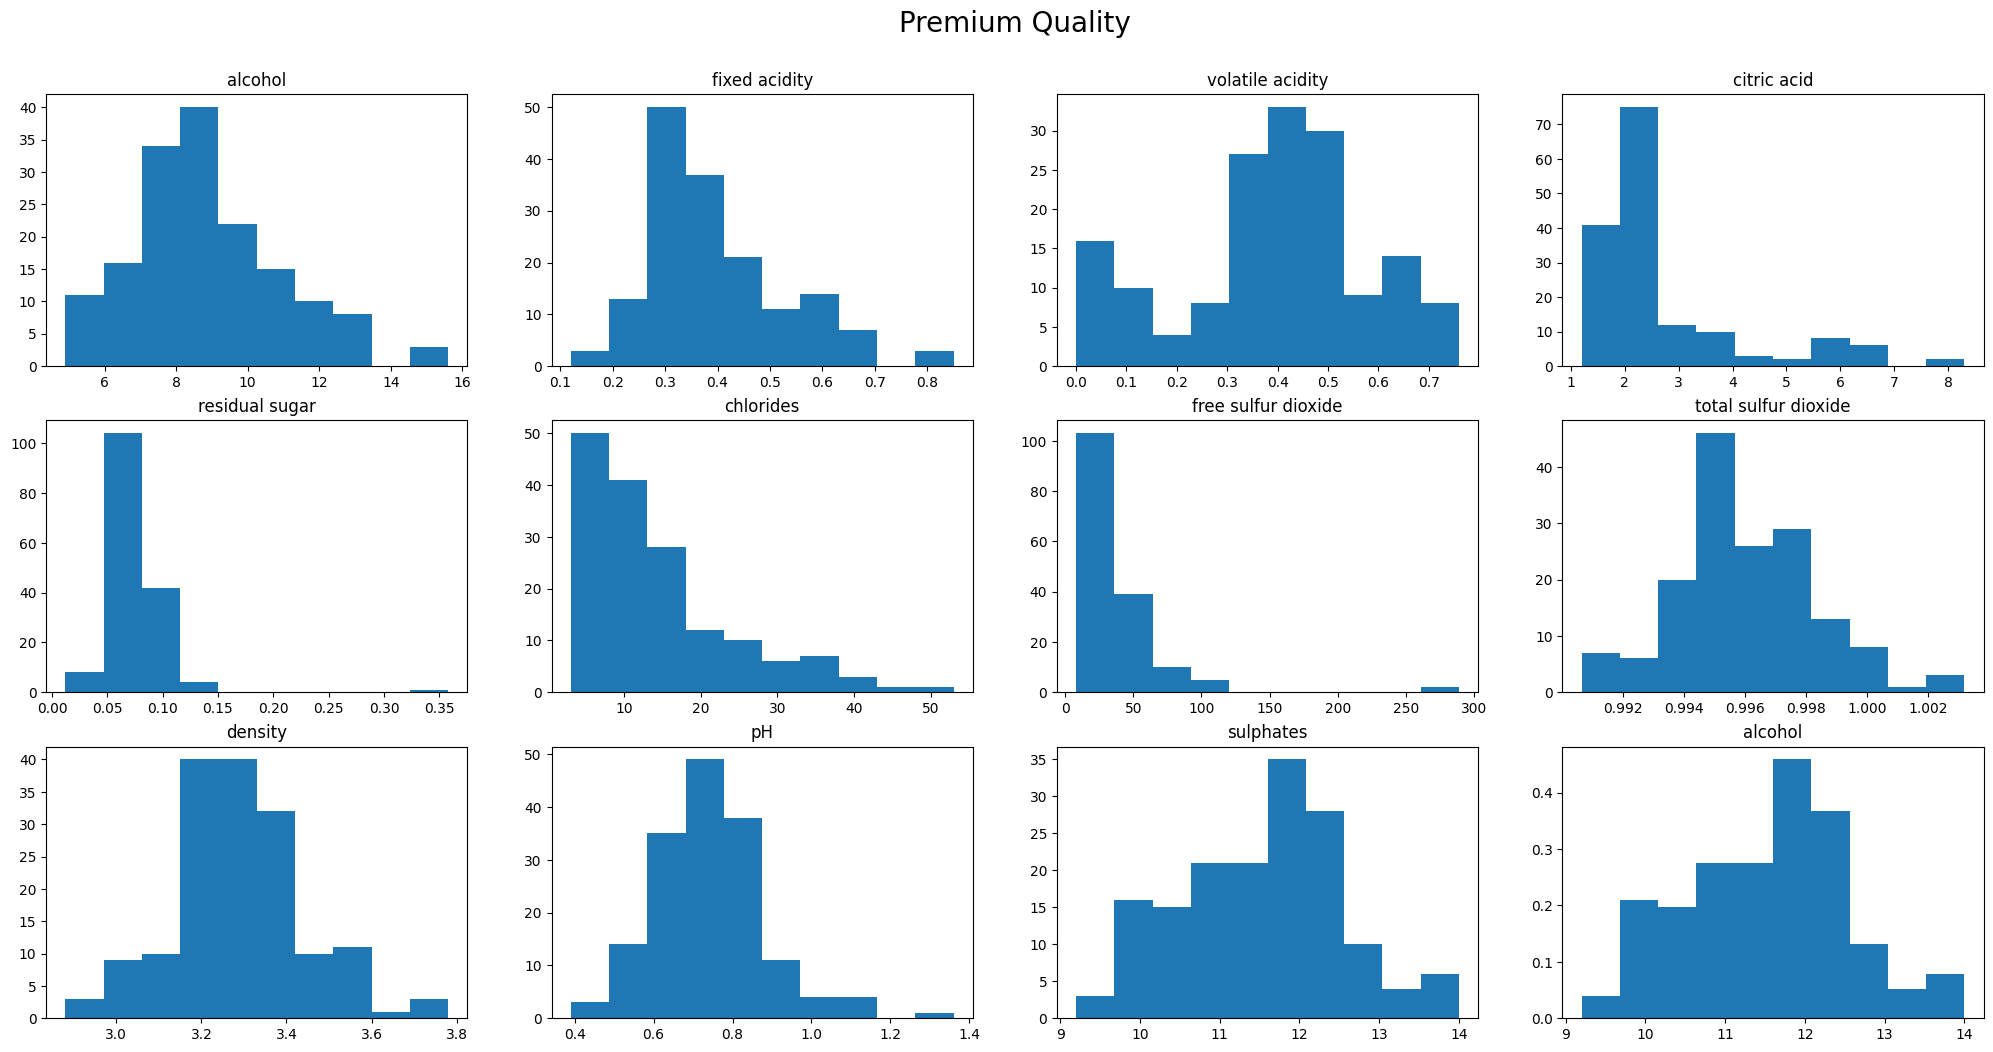

In [96]:
for quality in quality_data.keys():
    cols = quality_data[quality].columns[:-1]
    class_data = quality_data[quality]

    plt.figure(figsize=(25, 12))
    plt.title(quality, pad=45, fontdict={"size":20})
    plt.ylabel("Frequency")
    plt.axis("off")

    for i in range(4):
        for j in range(3):
            idx = (i*3) + j
            col_name = cols[idx - 1]
            if(idx + 1 == 12):
                plt.subplot(3,4,idx + 1), plt.hist(class_data[cols[idx - 1]], density=True), plt.title(col_name)
            else:
                plt.subplot(3,4,idx + 1), plt.hist(class_data[cols[idx]]), plt.title(col_name)


#### Class frequency plot

In [97]:
class_sample_distribution = {}
for key in quality_data.keys():
    class_sample_distribution[key] = len(quality_data[key])

<BarContainer object of 3 artists>

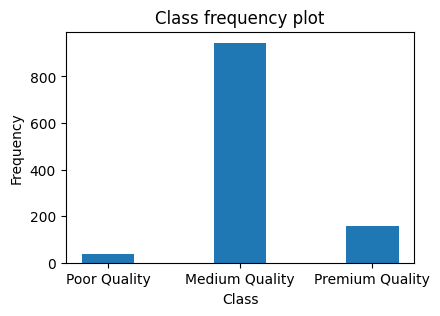

In [98]:
plt.figure(figsize=(4.5,3))
plt.title("Class frequency plot")
plt.xlabel("Class"), plt.ylabel("Frequency")
plt.bar(class_sample_distribution.keys(), class_sample_distribution.values(), width=0.4)

**What can you say regarding the quality (Y) classes distribution?**

It is clear that the class distribution is largely biased towards the Nedium Quality

**What is your conclusion regarding the expected performance of the classifier?**

Due to the biased nature of class samples, the performance is expected to be quite low

## **B)** Perform one run of modeling and test. Compare the obtained test accuracy by using:
1. One versus All Classifier
And
2. One versus One Classifier

In [99]:
map = {2: 0, 3: 0, 4: 0, 5:1, 6:1, 7:2, 8:2}
quality = data["quality"]
encoded_quality = quality.apply(lambda x: map[x])
data["Encoded_Quality"] = encoded_quality

data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Encoded_Quality
Id,,,,,,,,,,,,,
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


generate dataset for train and test using stratified sampling to keep same ratios of classes in train and test

In [100]:
X, y = data[data.columns[:-2]], data[data.columns[-1]]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

#### **One VS One Classification**

In [101]:
ovo = OneVsOneClassifier(
    # GaussianProcessClassifier(kernel=1.0 * RBF(1.0), random_state=3)
    GaussianProcessClassifier(random_state=3)
).fit(x_train, y_train)

y_pred = ovo.predict(x_test)

**confusion matrix**

In [102]:
print(confusion_matrix(y_pred=y_pred, y_true=y_test))

[[  0   8   0]
 [  6 171  12]
 [  0  14  18]]


[]

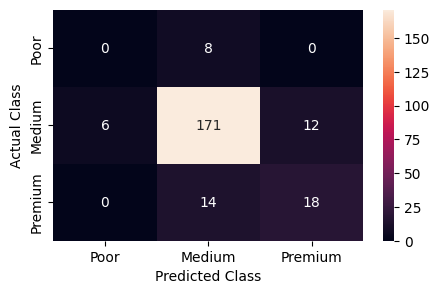

In [103]:
cf_martix_df = pd.DataFrame(confusion_matrix(y_pred=y_pred, y_true=y_test), index = ["Poor", "Medium", "Premium"],
                  columns = ["Poor", "Medium", "Premium"])
plt.figure(figsize = (5,3))
heatmap = sns.heatmap(cf_martix_df, annot=True, fmt="g")
heatmap.set_xlabel("Predicted Class")
heatmap.set_ylabel("Actual Class")
plt.plot()

here we can see that all predictions for the poor class were incorrect and almost half the predictions of premium class were also incorrect which is not desirable

**classification report**

In [104]:
print(classification_report(y_pred=y_pred, y_true=y_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.89      0.90      0.90       189
           2       0.60      0.56      0.58        32

    accuracy                           0.83       229
   macro avg       0.50      0.49      0.49       229
weighted avg       0.82      0.83      0.82       229



#### **One VS Rest Classification**

In [105]:
ovo = OneVsRestClassifier(
    # GaussianProcessClassifier(kernel=1.0 * RBF(1.0), random_state=3)
    GaussianProcessClassifier(random_state=3)
).fit(x_train, y_train)

y_pred = ovo.predict(x_test)

**confusion matrix**

In [106]:
print(confusion_matrix(y_pred=y_pred, y_true=y_test))

[[  0   8   0]
 [  6 171  12]
 [  0  14  18]]


[]

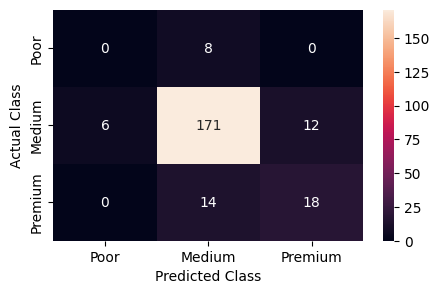

In [107]:
cf_martix_df = pd.DataFrame(confusion_matrix(y_pred=y_pred, y_true=y_test), index = ["Poor", "Medium", "Premium"],
                  columns = ["Poor", "Medium", "Premium"])
plt.figure(figsize = (5,3))
heatmap = sns.heatmap(cf_martix_df, annot=True, fmt="g")
heatmap.set_xlabel("Predicted Class")
heatmap.set_ylabel("Actual Class")
plt.plot()

**classification report**

In [108]:
print(classification_report(y_pred=y_pred, y_true=y_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.89      0.90      0.90       189
           2       0.60      0.56      0.58        32

    accuracy                           0.83       229
   macro avg       0.50      0.49      0.49       229
weighted avg       0.82      0.83      0.82       229

